Reference: https://github.com/WNoxchi/Kaukasos/blob/master/FADL1/L3CA_lesson2-image-models.ipynb

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
%ls fastai_lin/

column_data.py   imports.py          learner.py  nlp.py        sgdr.py
conv_learner.py  initializers.py     lm_rnn.py   plots.py      structured.py
core.py          __init__.py         losses.py   __pycache__/  torch_imports.py
dataloader.py    io.py               metrics.py  rnn_reg.py    transforms.py
dataset.py       layer_optimizer.py  model.py    rnn_train.py  utils.py*
images/          layers.py           models/     set_spawn.py  weights/


### Platform Check & Imports

In [2]:
%pwd

'/home/wnixalo/Aersu/GLOC'

In [7]:
from sys import platform
if platform[:3] == 'dar':
    from fastai_osx.imports import *
    from fastai_osx.conv_learner import *
    from fastai_osx.model import *
    from fastai_osx.torch_imports import *
if platform[:3] == 'lin':
    from fastai_lin.imports import *
    from fastai_lin.conv_learner import *
    from fastai_lin.model import *
    from fastai_lin.torch_imports import *

### DataLoader & Learner

In [8]:
PATH = 'data/'
label_csv = f'{PATH}labels.csv'

In [9]:
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [10]:
arch = resnet34
size = 100

In [7]:
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=32, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)
# for speed
data.resize(int(size), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [8]:
data.trn_ds.fnames

array(['train/000000.jpg', 'train/000002.jpg', 'train/000003.jpg', ..., 'train/049517.jpg',
       'train/049518.jpg', 'train/049519.jpg'],
      dtype='<U16')

In [9]:
learner = ConvLearner.pretrained(arch, data)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 794/1026 [01:24<00:24,  9.42it/s, loss=2.01] 

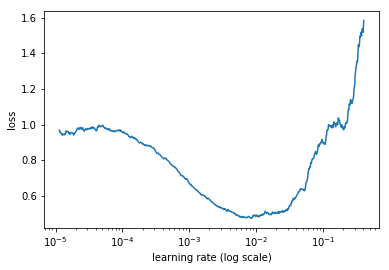

In [10]:
learner.lr_find()
learner.sched.plot()

In [11]:
λr = 2e-3

In [12]:
learner.fit(λr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))


  8%|▊         | 79/1026 [00:08<01:44,  9.09it/s, loss=0.835]

  8%|▊         | 81/1026 [00:08<01:43,  9.10it/s, loss=0.825]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed

[ 0.       0.40057  0.34499  0.82442]                          
[ 1.       0.35677  0.30631  0.85457]                          
[ 2.       0.35292  0.28403  0.86406]                          



In [13]:
%time learner.fit(λr, 3, cycle_len=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=6), HTML(value='')))

[ 0.       0.33354  0.26675  0.87767]                          
[ 1.       0.32525  0.25844  0.88412]                          
[ 2.       0.31892  0.24172  0.89664]                          
[ 3.       0.29591  0.23781  0.90078]                          
[ 4.       0.30765  0.22929  0.90674]                          
[ 5.       0.29556  0.227    0.90674]                          

CPU times: user 31min 53s, sys: 3min 54s, total: 35min 47s
Wall time: 12min 54s


In [14]:
learner.save('100')

In [15]:
%time learner.fit(λr, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

[ 0.       0.30655  0.224    0.90382]                          
[ 1.       0.29098  0.22193  0.90965]                          
[ 2.       0.26844  0.21412  0.91221]                          
[ 3.       0.26111  0.21233  0.91634]                          
[ 4.       0.26798  0.20129  0.91464]                          
[ 5.       0.26162  0.2063   0.9189 ]                          
[ 6.       0.26926  0.20507  0.90978]                          
[ 7.       0.26509  0.20278  0.91148]                          
[ 8.       0.25779  0.18544  0.92558]                          
[ 9.       0.23394  0.18239  0.9268 ]                          
[ 10.        0.24376   0.18494   0.92449]                      
[ 11.        0.2402    0.18218   0.92583]                      
[ 12.        0.24941   0.1784    0.92498]                      
[ 13.        0.25138   0.18083   0.92814]                      

CPU times: user 1h 13min 54s, sys: 9min 13s, total: 1h 23min 7s
Wall time: 30min 15s


In [16]:
learner.save('100')

In [17]:
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=16, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)
learner.set_data(data)
λr = λr/2 # lowering learning rate due to lower batch size

In [19]:
λrs = [λr/1e2, λr/1e1, λr]
learner.unfreeze()

In [20]:
# testing GPU mem usage & time ## 1890-3006/3017 @ size=100
%time learner.fit(λrs, 1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.27783  0.20637  0.92373]                          

CPU times: user 9min 18s, sys: 2min 32s, total: 11min 51s
Wall time: 8min 2s


In [21]:
learner.save('100_uf')

In [23]:
learner.fit(λrs, 3, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

[ 0.       0.22614  0.15489  0.94189]                          
[ 1.       0.19981  0.10811  0.95663]                          
[ 2.       0.15412  0.10415  0.95785]                          
[ 3.       0.15563  0.0907   0.96357]                          
[ 4.       0.134    0.07376  0.97234]                          
[ 5.       0.13234  0.06936  0.97283]                           
[ 6.       0.10379  0.074    0.97234]                           



In [24]:
learner.save('100_uf')

In [27]:
size = 200
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=16, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)
data.resize(int(size), 'tmp')

HBox(children=(IntProgress(value=0, max=6), HTML(value='')))

In [28]:
learner.set_data(data)

In [29]:
# forgot to refreeze Conv layers
learner.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 71%|███████   | 1452/2052 [03:42<01:31,  6.52it/s, loss=1.43] 

NameError: name 'learn' is not defined

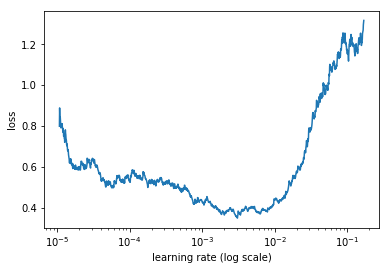

In [30]:
learner.sched.plot()

In [31]:
learner.freeze()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  1%|          | 25/2052 [00:04<06:03,  5.58it/s, loss=0.601]
                                                              [A
  1%|▏         | 27/2052 [00:04<05:48,  5.81it/s, loss=0.598]

Exception in thread Thread-45:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-44:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set chang

 70%|███████   | 1437/2052 [03:40<01:34,  6.52it/s, loss=1.54] 


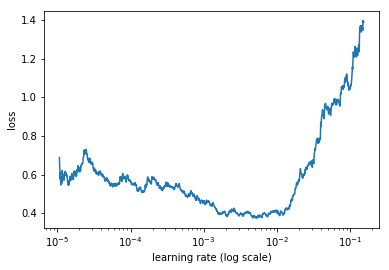

In [32]:
learner.lr_find()
learner.sched.plot()

In [34]:
learner.data.bs = 24
learner.data.bs

24

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 70%|███████   | 1440/2052 [03:40<01:33,  6.53it/s, loss=1.48] 

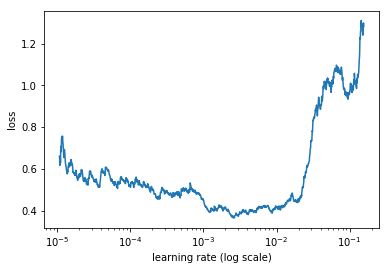

In [35]:
learner.lr_find()
learner.sched.plot()

In [38]:
λr = 9e-4

In [39]:
learner.fit(λr, 1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))


  2%|▏         | 49/2052 [00:08<05:31,  6.04it/s, loss=0.576]

Exception in thread Thread-47:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration

Exception in thread Thread-46:
Traceback (most recent call last):
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/wnixalo/miniconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set chang

[ 0.       0.33927  0.29921  0.87329]                          



In [40]:
learner.save('200')

In [41]:
%time learner.fit(λr, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

[ 0.       0.32853  0.26594  0.88682]                          
[ 1.       0.31546  0.26548  0.8884 ]                          
[ 2.       0.32817  0.25094  0.89815]                          
[ 3.       0.28611  0.23384  0.90814]                          
[ 4.       0.31058  0.22967  0.90911]                          
[ 5.       0.32728  0.22728  0.90899]                          
[ 6.       0.30243  0.2211   0.90948]                          
[ 7.       0.26272  0.21812  0.90863]                          
[ 8.       0.28752  0.2049   0.91898]                          
[ 9.       0.27126  0.20253  0.9191 ]                          
[ 10.        0.26256   0.19567   0.92203]                      
[ 11.        0.26871   0.19808   0.92495]                      
[ 12.        0.24498   0.19312   0.92678]                      
[ 13.        0.25224   0.1922    0.92556]                      

CPU times: user 2h 18min 52s, sys: 27min 58s, total: 2h 46min 51s
Wall time: 1h 29min 21s


In [42]:
learner.save('200')

In [44]:
λr

0.0009

In [46]:
λr /= 2
λrs = [λr/1e2, λr/1e1, λr]
learner.unfreeze()
learner.data.bs = 12

In [47]:
%time learner.fit(λrs, 1, cycle_len=1, cycle_mult=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

[ 0.       0.2549   0.18199  0.9258 ]                          

CPU times: user 18min 49s, sys: 7min 27s, total: 26min 17s
Wall time: 20min 47s


In [48]:
learner.save('200_uf')

In [49]:
%time learner.fit(λrs, 3, cycle_len=2, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=14), HTML(value='')))

[ 0.       0.20225  0.16333  0.93738]                          
[ 1.       0.21023  0.15333  0.94152]                          
[ 2.       0.19406  0.12813  0.95029]                          
[ 3.       0.1622   0.12327  0.95358]                          
[ 4.       0.20431  0.11177  0.95614]                          
[ 5.       0.16713  0.11503  0.95602]                          
[ 6.       0.14852  0.10456  0.96028]                          
[ 7.       0.1341   0.09728  0.96272]                          
[ 8.       0.11662  0.09491  0.9626 ]                          
[ 9.       0.13007  0.08162  0.96723]                          
[ 10.        0.10967   0.08696   0.96674]                      
[ 11.        0.126     0.07568   0.97149]                       
[ 12.        0.11396   0.08374   0.9665 ]                       
[ 13.        0.10556   0.08131   0.96918]                       

CPU times: user 4h 23min 42s, sys: 1h 44min 36s, total: 6h 8min 19s
Wall time: 4h 50min 34s


In [50]:
learner.save('200_uf_01')

### Troubleshooting Dead-Kernel

In [ ]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

from fastai_lin.imports import *
from fastai_lin.conv_learner import *
from fastai_lin.model import *
from fastai_lin.torch_imports import *

In [8]:
PATH = 'data/'
label_csv = f'{PATH}labels.csv'

n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [10]:
arch = resnet34M

size = 400
tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', label_csv, bs=12, tfms=tfms,
                                    suffix='.jpg', val_idxs=val_idxs, num_workers=8)
#after dead kernel:
learner = ConvLearner.pretrained(arch, data)

learner.set_data(data)
learner.freeze()

learner.load('200_uf_01')

In [ ]:
%time learner.lr_find()
learner.sched.plot()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 25%|██▍       | 681/2736 [05:43<17:15,  1.98it/s, loss=0.363]

[How to visualize/display a data image in ‘torch.FloatTensor’ type](https://discuss.pytorch.org/t/how-to-visualize-display-a-data-image-in-torch-floattensor-type/7770)

[Plotting numpy arrays as images](https://matplotlib.org/users/image_tutorial.html#plotting-numpy-arrays-as-images)

[ython make RGB image from 3 float32 numpy arrays
](https://stackoverflow.com/questions/26918390/python-make-rgb-image-from-3-float32-numpy-arrays)

[How to create image from numpy float32 array?
](https://stackoverflow.com/questions/38867869/how-to-create-image-from-numpy-float32-array)